## **Exercises: Lesson 4**

Hanaan Shafi 


---



**Exercise 4.1**: Prepare a file with a function called fence such that given two strings as arguments: string_1 = "aaa" and string_2 = "bbb", the output is aaa_bbb_aaa. In the same file define a second function called outer such that given a string returns another string made up of just the first and last characters of its input. Therefore if the input is Betis the function output should be Bs. Include in both cases a docstring with a brief function description and an example. Load the functions from the file and check what is the output of this statement: print outer(fence('carbon', '+')).

In [1]:
def fence(string_1, string_2):
  """Return a string with the two strings joined in the order 1st, 2nd, 1st."""
  return (string_1 + string_2 + string_1)

def outer(string):
  """Return a string with the first and last characters of the original string."""
  return (string[0] + string[-1])

print(outer(fence('carbon', '+')))

cn


**Exercise 4.2**: Write a function that generates a random password. The password should have a random length of between 10 and 12 random characters from positions 33 to 122 in the ASCII table. Your function will not take any parameters and will return the password as its only result. 

In [2]:
from random import randint

def password_generator():
    """
    Generates a random password with length 10-12 using
    random characters with ASCII positions 13-22
    """
    password = "" # create empty password string to store password

    for i in range(randint(10, 12)): # we iterate over a number that is equal to the length of the password, which is chosen randomly
      password += chr(randint(33, 122)) # for each iteration, we add a random character 

    return password

print("your password is: ", password_generator())

your password is:  kAv@BrwNFh


Make another function that checks if the password has at least two lowercase, two uppercase, and two digit characters and the output of this function will be a compliant password and the number of times has been run the original function to obtain the compliant password.

In [3]:
def password_compliance(password):
  """
  Checks if the password has at least 2 uppercase and 
  2 lowercase characters, and 2 digits. 
  """
  l = 0 # number of lowercase letters
  u = 0 # number of uppercase letters
  d = 0 # number of digits
  for i in password:
    if i.islower():
      l += 1
    elif i.isupper():
      u += 1
    elif i.isdigit():
      d += 1
  
  if l==2 and u==2 and d==2:
    print("This password is compliant.")
  else:
    print("This password is not compliant")

password_compliance("kAv@BrwNFh")

This password is not compliant


**Exercise 4.3**: Gaussian distributed data are frequently normalized to have a mean value equal to zero and a standard deviation equal to one substracting the actual mean value and dividing by the standard deviation of the dataset. Making use of the mean and std NumPy methods, define a function that takes as an argument a data vector, a new mean value, and a new standard deviation value and transforms the original set of data to a new set with a the new mean as its average value and with a dispersion given by the new standard deviation value. By default the function should standardize the data to mean = 0 and sdev = 1.

In [4]:
import numpy as np
def transform(vector, new_mean=0, new_std=1): 
  """
  Transforms original data set to a new data set 
  with new mean and standard deviation. 
  By default, the new mean and standard deviation
  are 0 and 1, respectively.
  """

  # for the input vector, we have
  old_mean = np.mean(vector)
  old_std = np.std(vector)

  # for our new vector, we have
  new_vector = [] # with new_mean and new_std

  for i in vector:
    j = new_mean + ((i - old_mean)*(new_std/old_std)) 
    # we arrive at this result by first transforming our original vector to have 
    # mean=0 and std=1, and subsequently transforming it to our desired values
    new_vector.append(j)

  return new_vector


In [5]:
# testing 
vector = np.array([1, 2, 3, 4, 5, 6])
transform(vector, 5, 2)

[2.0722997811544004,
 3.24337986869264,
 4.41445995623088,
 5.58554004376912,
 6.7566201313073595,
 7.927700218845599]

**Exercise 4.4**: You can approximate the cubic root of a number $a$ as:
$$
x_{n+1}=\frac{1}{3}\left(\frac{a}{x_{n}^{2}}+2 x_{n}\right)
$$

with $x_{0} = \frac{a}{3}$. Prepare a function that computes the cubic root of a given number until the difference between successive computed values is less than a given threshold (e.g. $10^{-8}$) and compare the obtained value and the value of 
$x_{0}^{\frac{1}{3}}$.


In [6]:
def cubic_root(a, threshold=10**(-8)):
  """
  Computes the cubic root of a given number 'a' until 
  the difference between successive computed values is 
  below a given threshold.
  """
  x_n = a/3
  print(f"\nCube root of {a} is: ")
  while((((1/3)*((a/x_n**2)+(2*x_n)))**3 - a) >= threshold): # while the difference between successive computed values is above the threshold
    x_n = (1/3)*(2*x_n + a/x_n**2) # compute the value
    print(f"{x_n}")

# testing and comparing
a = int(input("Enter a number: \n"))
cubic_root(a)
print(" ")
print("The value of (x_0)**(1/3) is", (a/3)**(1/3))

Enter a number: 
1000

Cube root of 1000 is: 
222.22522222222221
148.1568979659018
98.78645101677405
65.89179134614366
44.00463524177474
29.508563532478096
20.055185101028723
14.19887693953672
11.119290630948697
10.108889559293956
10.001168710279952
10.00000013656709
 
The value of (x_0)**(1/3) is 6.933612743506346


**Exercise 4.5:** Define a function that reads out temperature data from the sample Cyprus dataset and prepare graphics. Prepare a function with helpful docstring and comments that for given list of file names prepares a plot with three columns for each data file: the first including the max, min and mean monthly temperatures, the second the max, min, and mean annual temperatures, and the third depicting the monthly temperatures for all years.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
files = ["T_Agrinio_EM.csv", "T_Ajjacio_EM.csv", "T_Alexandroupolis_EM.csv", 
              "T_Alicante_EM.csv", "T_Antalya_EM.csv", "T_Araxos_EM.csv"]

def tdata_plot(files):
  """
  Reads temperature data from a list of files, and for each file, 
  draws a plot with three subfigures based on the requirements of the 
  question.
  """
  for file in files:
    df = pd.read_csv(file).set_index("year") # read file into dataframe and set index to year

    # plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6)) 
    df.max().plot(ax=ax1, label = "Max") # along columns
    df.min().plot(ax=ax1, label = "Min")
    df.mean().plot(ax=ax1, label = "Mean")
    df.max(axis=1).plot(ax=ax2, label = "Max") # along rows
    df.min(axis=1).plot(ax=ax2, label = "Min")
    df.mean(axis=1).plot(ax=ax2, label = "Mean")
    df.T.plot(ax=ax3, legend=False) # transpose the original dataframe and then plot

    # plot customization
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Temperature")
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Temperature")
    ax3.set_xlabel("Month")
    ax3.set_ylabel("Temperature")
    plt.suptitle(file.split('_')[1], size = 20)
    ax1.set_title("Max, Min & Mean Monthly Temperatures")
    ax2.set_title("Max, Min & Mean Yearly Temperatures")
    ax3.set_title("Monthly Temperatures for All Years")
    plt.show()


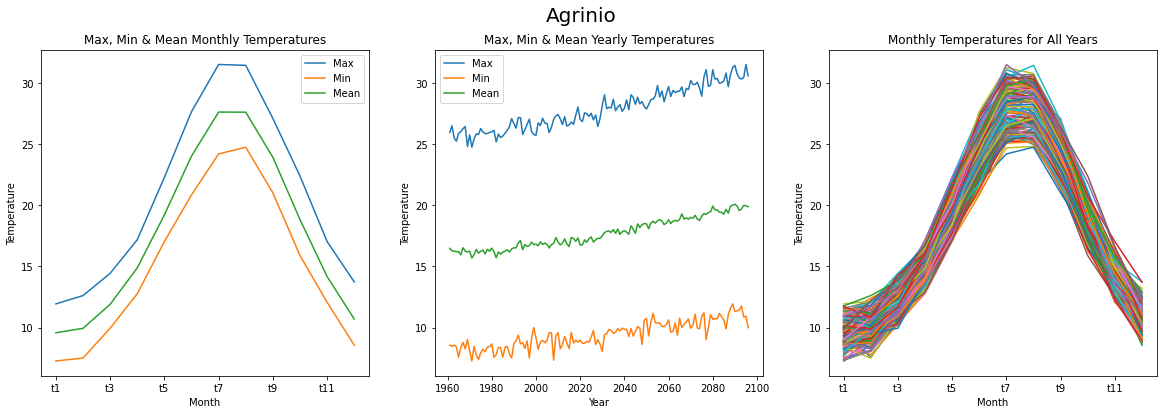

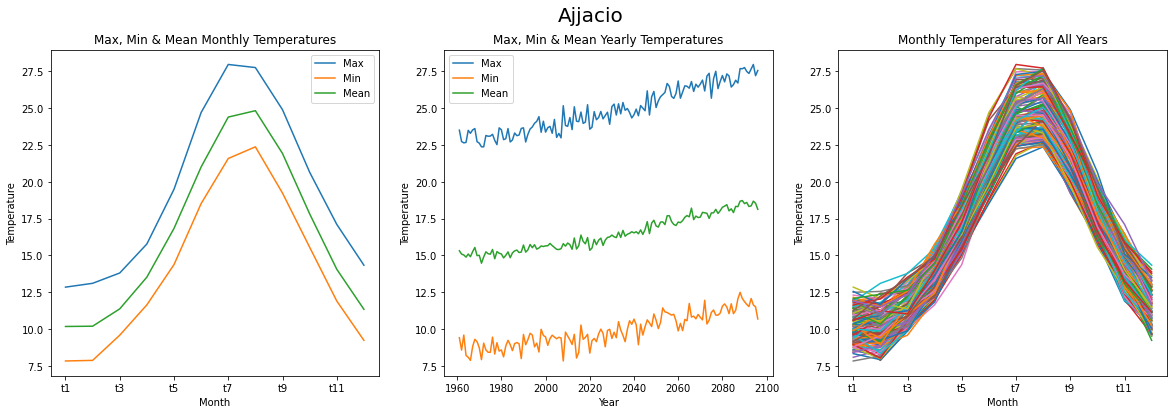

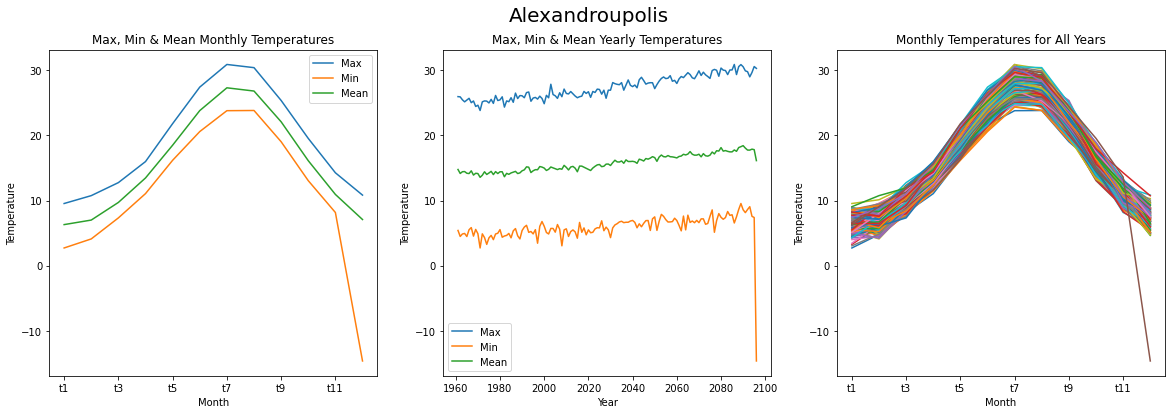

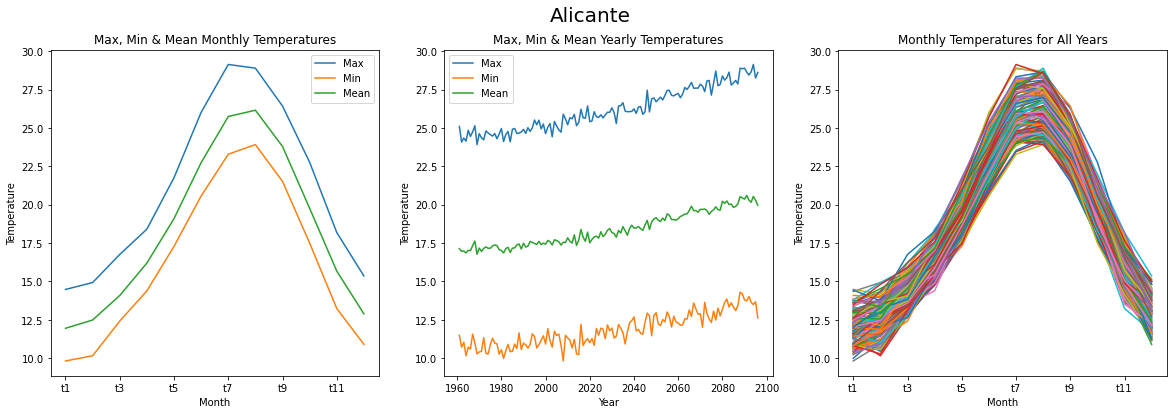

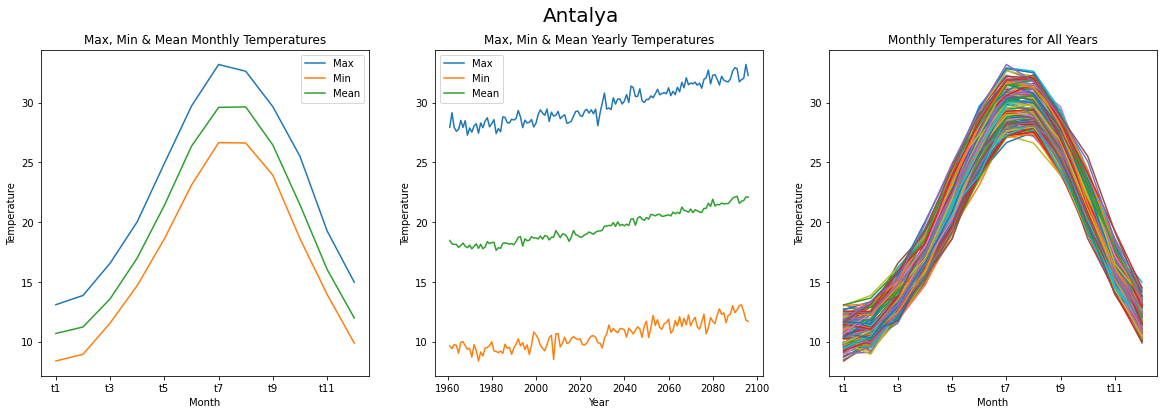

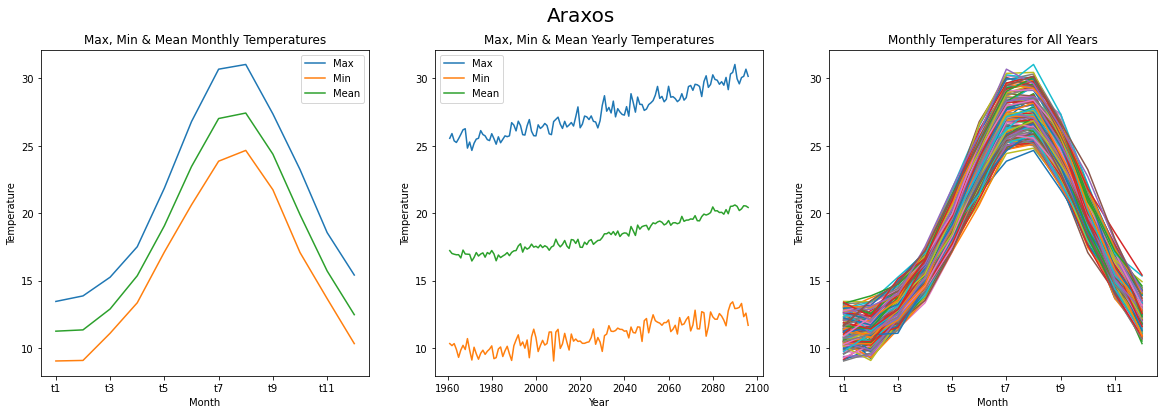

In [8]:
tdata_plot(files)

**Exercise 4.6:** The sieve of Erastosthenes is an ancient algorithm (approx. 3rd century BCE) to find all prime numbers up to a given limit. The implementation of this algorithm in pseudocode is as follows:

algorithm Sieve of Eratosthenes is input: an integer n > 1. 
output: all prime numbers from 2 through n.
```
let A be an array of Boolean values, indexed by integers 2 to n, initially all set to true.

for i = 2, 3, 4, ..., not exceeding n**0.5 do
if A[i] is true
    for j = i**2, i**2+i, i**2+2i, i**2+3i, ..., not exceeding n do
	A[j] := false

return all i such that A[i] is true.
```

In [9]:
def erastothenes(n):

  """
  Finds all prime numbers between 2 and an upper 
  limit set by n. 
  """
  A = []
  for i in range(n+1):
    A.append(True) # we made a list containing n Trues

  num = 2 # prime number counting starts at two
  while (n >= num**2): # while the number we arrive at is greater than or equal to num
    if (A[num] == True): # checking the corresponding value in A (True implies it is a prime number)
      for i in range(num**2, n + 1, num): 
        A[i] = False # change to false for all the multiples of num (not prime)
    num += 1 # proceeding to the next number

  for num in range(2, n+1): # loop to print all the values corresponding to True
    if A[num] == True:
        print(num)

# testing our function
erastothenes(int(input("Enter n: ")))

Enter n: 15
2
3
5
7
11
13
